In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Helper functions
===

In [87]:
def generate_grid(s):
    """
    Generates a grid of points in the square [-0.5, 0.5]^2
    such that the points are uniformly spaced.
    
    Args:
        - s: controls the number of points to generate, 
          which is s**2 in total
    """
    x = torch.range(-s / 2, s / 2 - 1)
    y = torch.range(-s / 2, s / 2- 1)
    grid = torch.stack([x.repeat(s), y.repeat(s, 1).t().contiguous().view(-1)],1)
    return grid / s


def contour_layer(activations, i=0, n=500):
    """
    Plots the zero-level set of the 2D function given 
    a grid of n points as computed by generate_grid.
    
    Args:
        - activations: n x n grid of the function f implemented 
          by the network such that activations[i, j] = f(grid[i, j])
          where grid = generate_grid(n)
        - i: layer index for color and linewidth 
        - n: such that the number of points in the original grid is n**2
    """
    colors = ['green', 'dodgerblue', 'orange']
    x = torch.range(-n / 2 , n / 2 - 1).numpy()
    for j, z in enumerate(activations.t()):
        z = z.view(n, n).detach().numpy()
        plt.contour(x, x, z, [1e-4], colors=colors[i], linewidths=2)
    return

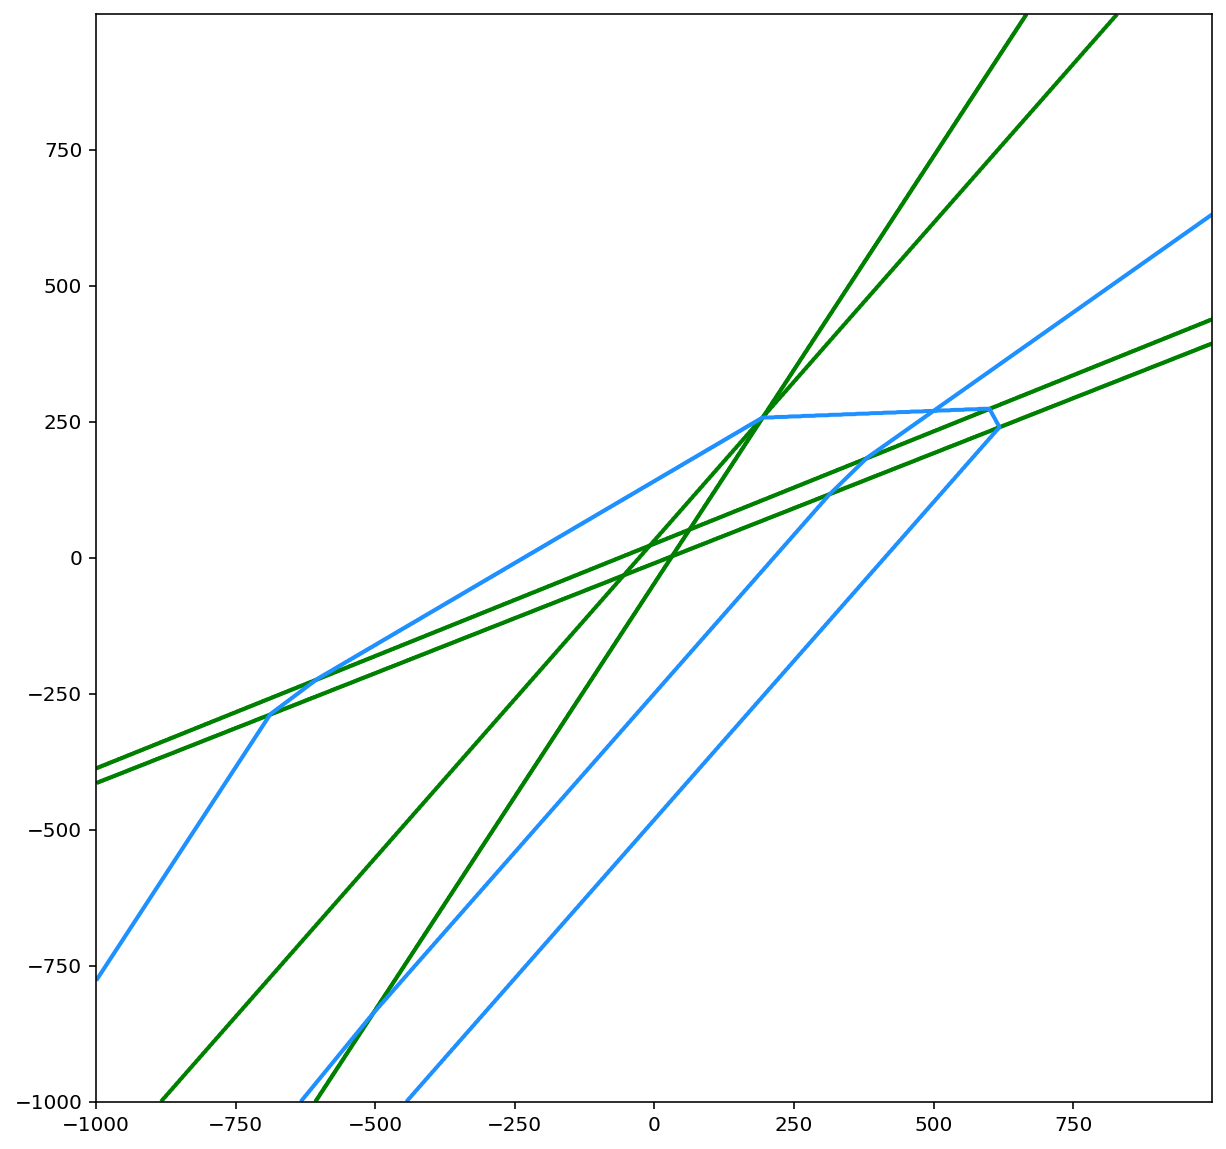

<Figure size 720x720 with 0 Axes>

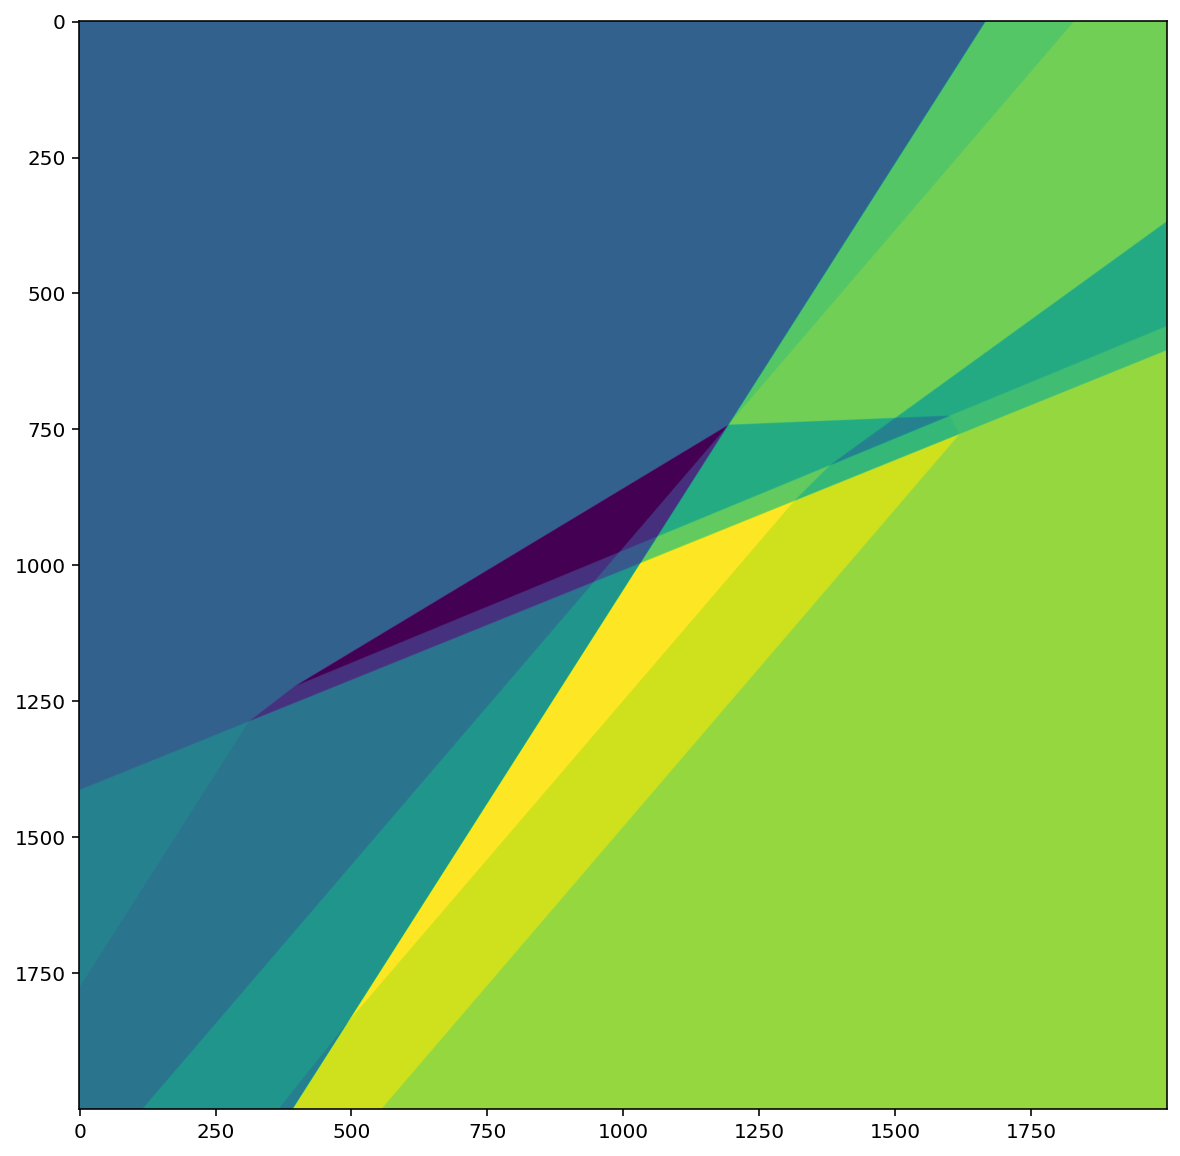

In [107]:
torch.manual_seed(1)


def plot_boundaries(n, h1, h2, s):
    """
    Randomly initializes a two-hidden layer ReLU network 
    with biases and plots the boundaries \Gamma_\nu for 
    each hidden neuron \nu. It assumes the input is 2D
    and the output is scalar.
    
    Args:
        - n: number of points for the grid
        - h1: number of hidden neurons in the first hidden layer
        - h2: number of hidden neurons in the second hidden layer
        - s: scaling factor for better display
    """
    
    # define and randomly initialize network 
    net_1 = nn.Sequential(nn.Linear(2, h1, bias=True), nn.ReLU())
    net_2 = nn.Sequential(nn.Linear(h1, h2 ,bias=True), nn.ReLU())
    net_3 = nn.Sequential(nn.Linear(h2, 1, bias=True))

    # gather activations of various layers 
    x = generate_grid(n)
    out_1 = net_1(s * x)
    out_2 = net_2(out_1)
    out_3 = net_3(out_2)
    out = out_3.view(n, n)

    # display the result
    plt.figure(figsize=(10 ,10))
    contour_layer(out_1, i=0, n=n)
    contour_layer(out_2, i=1, n=n)
    plt.show()
    
    plt.figure(figsize=(10 ,10))
    plt.figure(figsize=(10 ,10))
    plt.imshow(np.gradient(out.detach())[0][::-1][:])
    plt.show()
    
n = 2000
h1 = 4
h2 = 3
s = 20
plot_boundaries(n, h1, h2, s)

In [546]:
n = 1000
h1 = 3
h2 = 1
s = 100
eps = 1e-4

net_1 = nn.Sequential(nn.Linear(2, h1), nn.ReLU())
net_2 = nn.Sequential(nn.Linear(h1, h2), nn.ReLU())
net_3 = nn.Sequential(nn.Linear(h2, 1))

# nn.init.normal_(net_1[0].weight)
# nn.init.normal_(net_2[0].weight)
# nn.init.normal_(net_3[0].weight)


x = generate_grid(n)
out_1 = net_1(s * x)
out_2 = net_2(out_1)
out_3 = net_3(out_2)
out = out_3.view(n, n)

x = generate_grid(n)
out_1 = net_1(s * (x + eps))
out_2 = net_2(out_1)
out_3 = net_3(out_2)
out_bis = out_3.view(n, n)

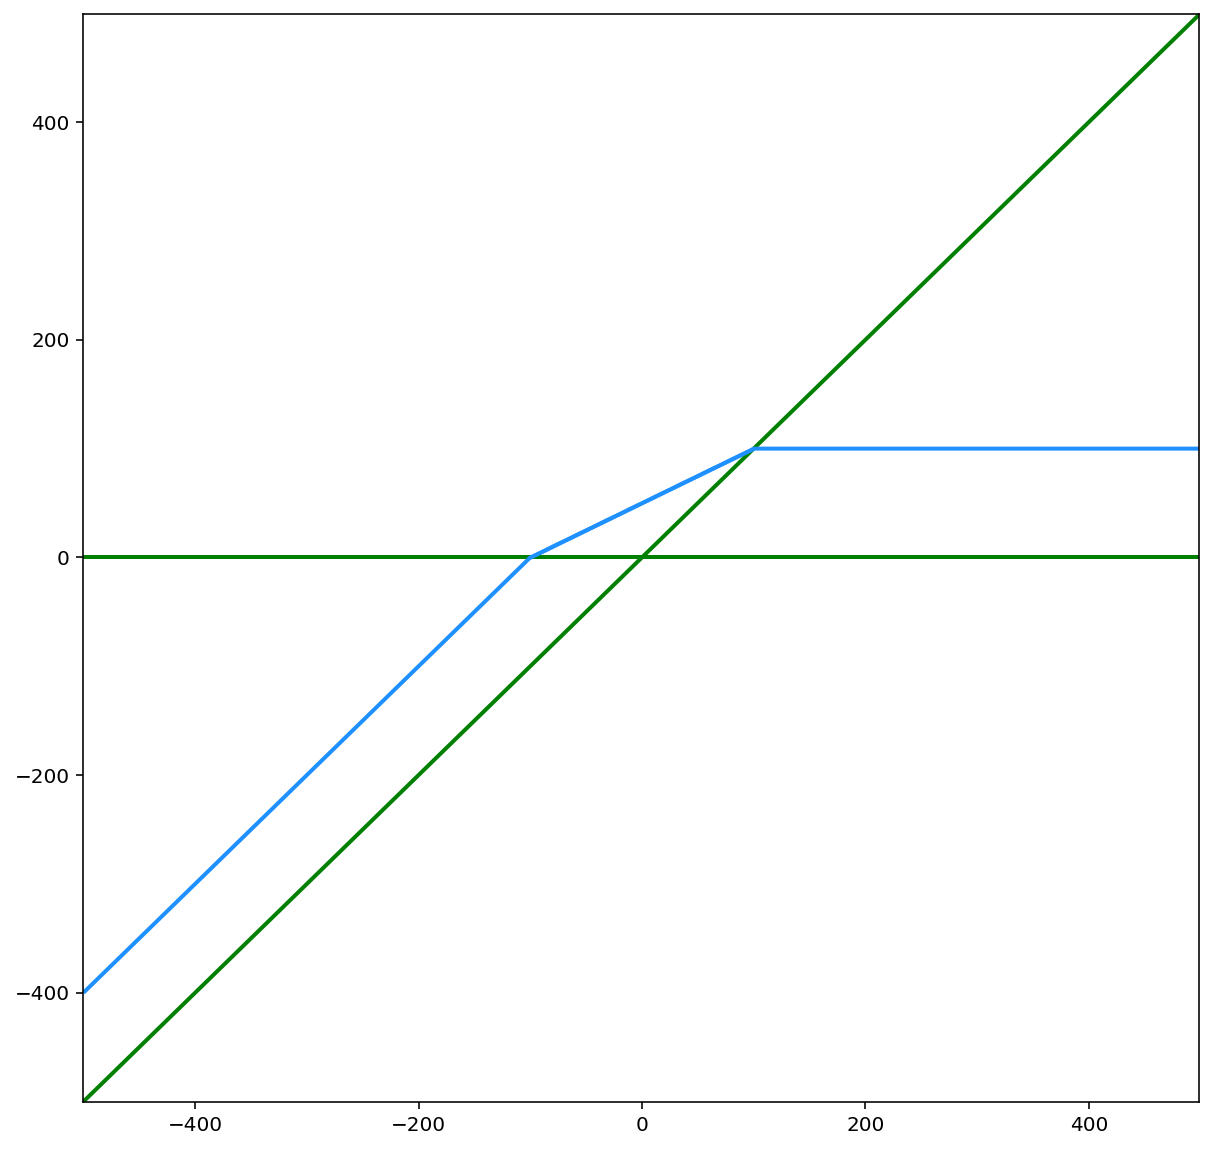

<Figure size 720x720 with 0 Axes>

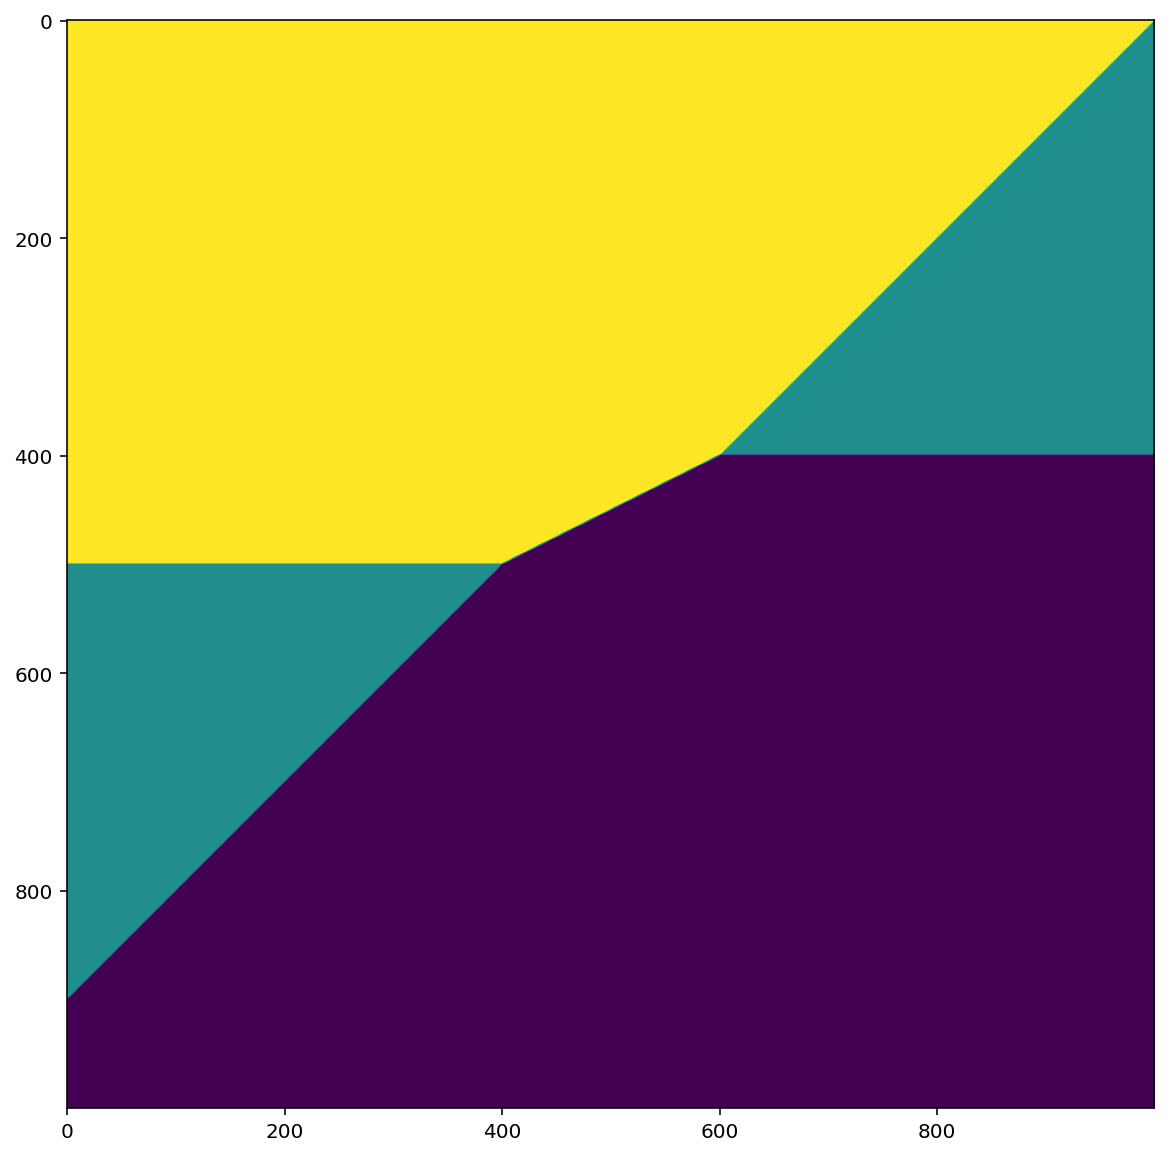

In [113]:
def plot_example():
    """
    Manually initializes a two-hidden layer ReLU network 
    and plots the boundaries \Gamma_\nu for each hidden 
    neuron \nu. It assumes the input is 2D and the output
    is scalar.
    
    Args:
        - n: number of points for the grid
        - h1: number of hidden neurons in the first hidden layer
        - h2: number of hidden neurons in the second hidden layer
        - s: scaling factor for better display
    """
    
    # define network architecture
    net_1 = nn.Sequential(nn.Linear(2, h1, bias=False), nn.ReLU())
    net_2 = nn.Sequential(nn.Linear(h1, h2 ,bias=True), nn.ReLU())
    net_3 = nn.Sequential(nn.Linear(h2, 1, bias=False))

    # manual initialization
    net_1[0].weight[0, 0] = 0
    net_1[0].weight[0, 1] = 1
    net_1[0].weight[1, 0] = -1
    net_1[0].weight[1, 1] = 1

    net_2[0].weight[0, 0] = 1
    net_2[0].weight[0, 1] = 1
    net_2[0].bias[0]=-10
    
    # gather activations of various layers 
    x = generate_grid(n)
    out_1 = net_1(s * x)
    out_2 = net_2(out_1)
    out_3 = net_3(out_2)
    out = out_3.view(n, n)

    # display the result
    plt.figure(figsize=(10 ,10))
    contour_layer(out_1, i=0, n=n)
    contour_layer(out_2, i=1, n=n)
    plt.show()
    
    plt.figure(figsize=(10 ,10))
    plt.figure(figsize=(10 ,10))
    plt.imshow(np.gradient(out.detach())[0][::-1][:])
    plt.show()
    

plot_example()